### Homework 08: due 11/14 23:59
##### Inception/BatchNorm/Callbacks/SeparableConv
- Try various experiments.

### Experiment 1. Inception

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from keras import models, layers
from keras import optimizers

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

#### Preparing data set

In [3]:
base_dir = './cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [4]:
# define generator
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# plot function
def show_plot(history):
    history_dict = history.history

    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']
    acc_values = history_dict['acc']
    val_acc_values = history_dict['val_acc']

    epochs = range(1, len(history_dict['acc']) + 1)

    plt.clf()
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc_values, 'bo', label='Training acc')
    plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [6]:
from keras.applications import InceptionV3

conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 256)               4718848   
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [7]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 257s 2s/step - loss: 0.4427 - acc: 0.7830 - val_loss: 0.2114 - val_acc: 0.9120
Epoch 2/30
100/100 [==============================] - 219s 2s/step - loss: 0.2196 - acc: 0.9150 - val_loss: 0.2571 - val_acc: 0.9090
Epoch 3/30
100/100 [==============================] - 241s 2s/step - loss: 0.1289 - acc: 0.9475 - val_loss: 0.2830 - val_acc: 0.8940
Epoch 4/30
100/100 [==============================] - 253s 3s/step - loss: 0.0850 - acc: 0.9705 - val_loss: 0.2647 - val_acc: 0.9040
Epoch 5/30
100/100 [==============================] - 257s 3s/step - loss: 0.0438 - acc: 0.9860 - val_loss: 0.3082 - val_acc: 0.8930
Epoch 6/30
100/100 [==============================] - 246s 2s/step - loss: 0.0368 - acc: 0.9870 - val_loss: 0.3174 - val_acc: 0.8990
Epoch 7/30
100/100 [==============================] - 258s 3s/step - loss: 0.0446 - acc: 0.9870 - val_loss: 0.3319 - val_acc: 0.8960
Epoch 8/30
100/100 [==============================] - 268s 3s/step - loss: 0.038

<Figure size 640x480 with 0 Axes>

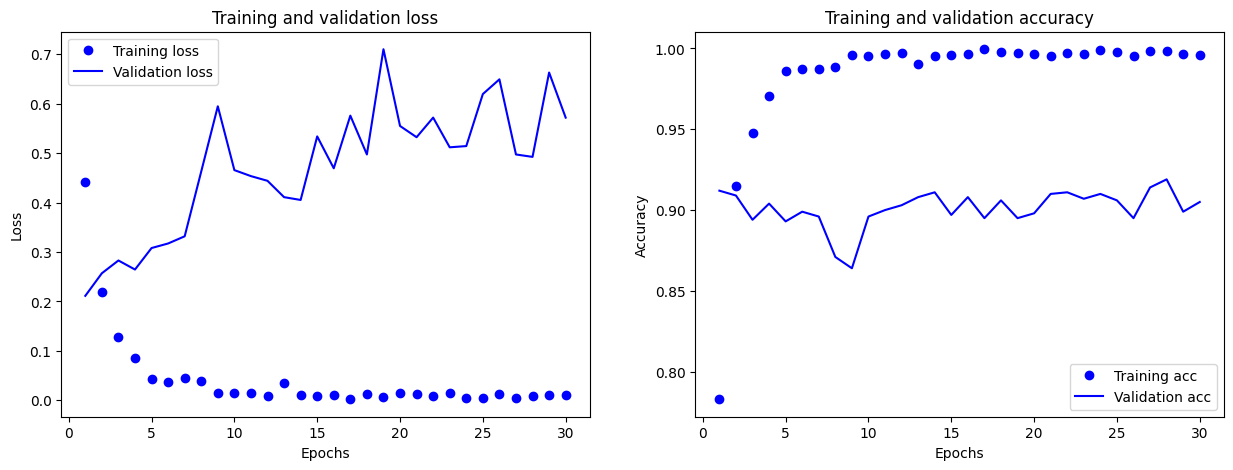

In [8]:
show_plot(history)

In [9]:
results = model.evaluate(test_generator)
print('test accuracy is {} % '.format(results[1]*100))

50/50 [==============================] - 23s 462ms/step - loss: 0.6111 - acc: 0.9080
test accuracy is 90.79999923706055 % 


In [10]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 606s 6s/step - loss: 0.3005 - acc: 0.8670 - val_loss: 0.1624 - val_acc: 0.9410
Epoch 2/30
100/100 [==============================] - 482s 5s/step - loss: 0.1048 - acc: 0.9595 - val_loss: 0.1466 - val_acc: 0.9360
Epoch 3/30
100/100 [==============================] - 502s 5s/step - loss: 0.0430 - acc: 0.9855 - val_loss: 0.1334 - val_acc: 0.9490
Epoch 4/30
100/100 [==============================] - 493s 5s/step - loss: 0.0162 - acc: 0.9940 - val_loss: 0.2515 - val_acc: 0.9310
Epoch 5/30
100/100 [==============================] - 473s 5s/step - loss: 0.0152 - acc: 0.9960 - val_loss: 0.1374 - val_acc: 0.9570
Epoch 6/30
100/100 [==============================] - 441s 4s/step - loss: 0.0151 - acc: 0.9970 - val_loss: 0.1754 - val_acc: 0.9510
Epoch 7/30
100/100 [==============================] - 13076s 132s/step - loss: 0.0096 - acc: 0.9965 - val_loss: 0.1748 - val_acc: 0.9520
Epoch 8/30
100/100 [==============================] - 525s 5s/step - loss: 0

<Figure size 640x480 with 0 Axes>

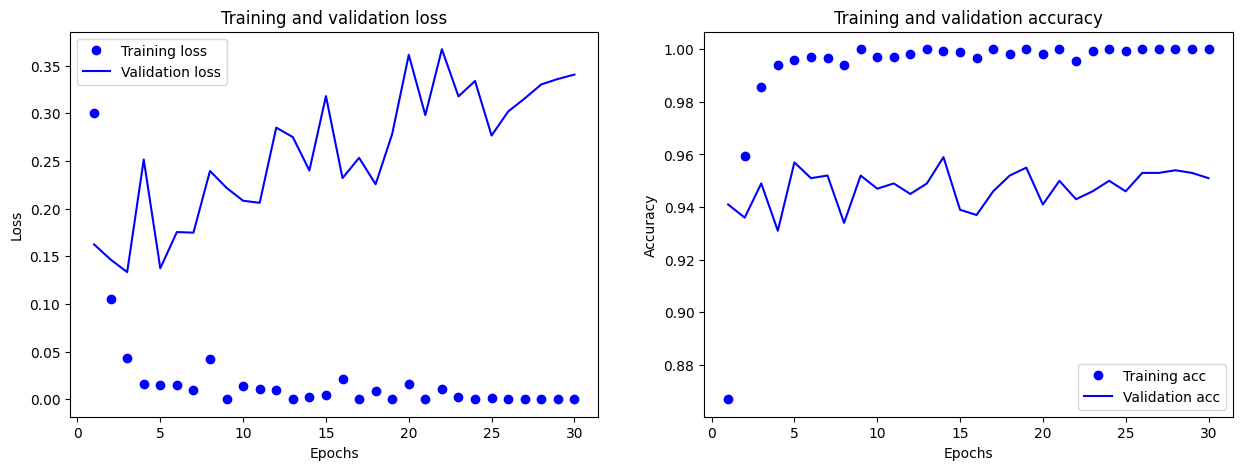

In [12]:
show_plot(history)

In [13]:
results = model.evaluate(test_generator)
print('test accuracy is {} % '.format(results[1]*100))

50/50 [==============================] - 39s 771ms/step - loss: 0.4021 - acc: 0.9540
test accuracy is 95.39999961853027 % 


### Early stopping and Check point

In [14]:
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(150, 150, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 3, 3, 2048)        21802784  
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 256)               4718848   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 26,521,889
Trainable params: 26,487,457
Non-trainable params: 34,432
_________________________________________________________________


In [15]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
# Early Stopping
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=5)
# Save Best Model
best_model = './models/bestmodelInception.h5'
mc = ModelCheckpoint(best_model,
                     monitor='val_acc',
                     mode='max',
                     verbose=1,
                     save_best_only=True)

In [16]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50,
            callbacks=[mc, es])

Epoch 1/30


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 [==============================] - ETA: 0s - loss: 0.4309 - acc: 0.7905
Epoch 1: val_acc improved from -inf to 0.91800, saving model to ./models\bestmodelInception.h5
100/100 [==============================] - 244s 2s/step - loss: 0.4309 - acc: 0.7905 - val_loss: 0.2105 - val_acc: 0.9180
Epoch 2/30
100/100 [==============================] - ETA: 0s - loss: 0.2105 - acc: 0.9090
Epoch 2: val_acc did not improve from 0.91800
100/100 [==============================] - 240s 2s/step - loss: 0.2105 - acc: 0.9090 - val_loss: 0.2744 - val_acc: 0.9050
Epoch 3/30
100/100 [==============================] - ETA: 0s - loss: 0.1275 - acc: 0.9480
Epoch 3: val_acc did not improve from 0.91800
100/100 [==============================] - 275s 3s/step - loss: 0.1275 - acc: 0.9480 - val_loss: 0.2825 - val_acc: 0.8960
Epoch 4/30
100/100 [==============================] - ETA: 0s - loss: 0.0717 - acc: 0.9725
Epoch 4: val_acc did not improve from 0.91800
100/100 [==============================] - 274s 

<Figure size 640x480 with 0 Axes>

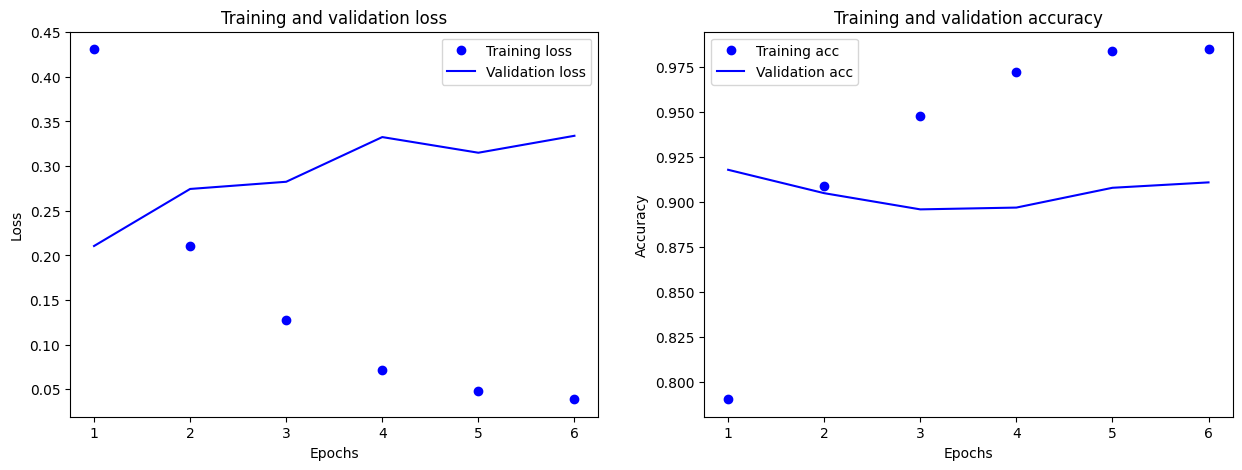

In [17]:
show_plot(history)

In [18]:
model = models.load_model(best_model)
results = model.evaluate(test_generator)
print('test accuracy is {} % '.format(results[1]*100))

50/50 [==============================] - 16s 281ms/step - loss: 0.1939 - acc: 0.9230
test accuracy is 92.29999780654907 % 


### Batch Normalization

In [19]:

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_188 (Conv2D)         (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_189 (Conv2D)         (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_190 (Conv2D)         (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 256)     

In [20]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5)
best_model = './models/bestmodelNonBN.h5'
mc = ModelCheckpoint(best_model,
                     monitor='val_acc',
                     mode='max',
                     save_best_only=True)

In [21]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50,
            callbacks=[es, mc])

Epoch 1/30


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 [==============================] - 137s 1s/step - loss: 0.6910 - acc: 0.5230 - val_loss: 0.6793 - val_acc: 0.5890
Epoch 2/30
100/100 [==============================] - 135s 1s/step - loss: 0.6739 - acc: 0.5760 - val_loss: 0.6650 - val_acc: 0.5780
Epoch 3/30
100/100 [==============================] - 136s 1s/step - loss: 0.6560 - acc: 0.6055 - val_loss: 0.6472 - val_acc: 0.6300
Epoch 4/30
100/100 [==============================] - 135s 1s/step - loss: 0.6389 - acc: 0.6380 - val_loss: 0.6731 - val_acc: 0.5660
Epoch 5/30
100/100 [==============================] - 136s 1s/step - loss: 0.6181 - acc: 0.6555 - val_loss: 0.6254 - val_acc: 0.6360
Epoch 6/30
100/100 [==============================] - 136s 1s/step - loss: 0.5835 - acc: 0.6895 - val_loss: 0.6286 - val_acc: 0.6430
Epoch 7/30
100/100 [==============================] - 136s 1s/step - loss: 0.5657 - acc: 0.7115 - val_loss: 0.6058 - val_acc: 0.6470
Epoch 8/30
100/100 [==============================] - 136s 1s/step - loss: 0.543

<Figure size 640x480 with 0 Axes>

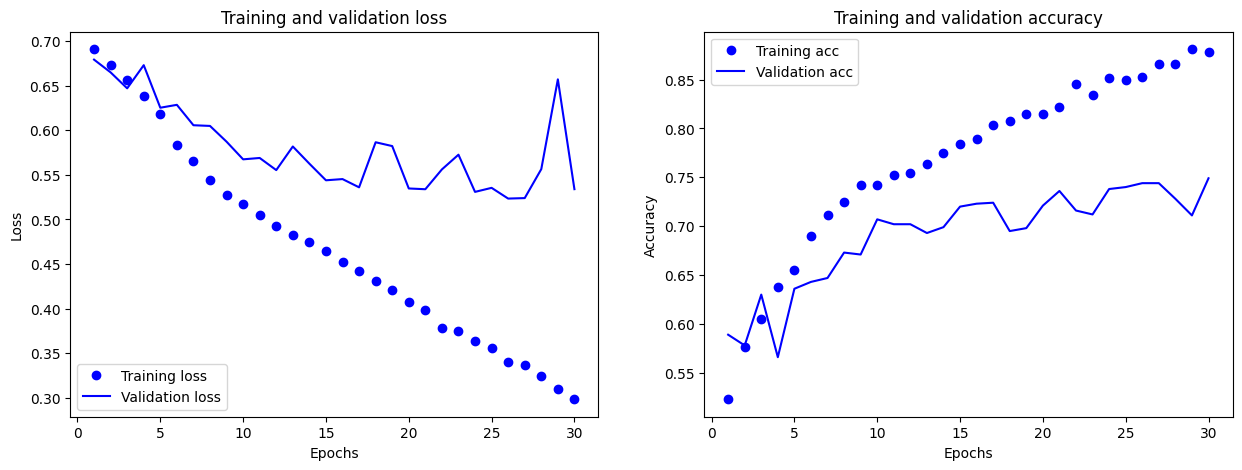

In [22]:
show_plot(history)

In [23]:
model = models.load_model(best_model)
results = model.evaluate(test_generator)
print('test accuracy is {} % '.format(results[1]*100))

50/50 [==============================] - 11s 222ms/step - loss: 0.5388 - acc: 0.7570
test accuracy is 75.70000290870667 % 


In [24]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_192 (Conv2D)         (None, 148, 148, 64)      1792      
                                                                 
 batch_normalization_188 (Ba  (None, 148, 148, 64)     256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_193 (Conv2D)         (None, 72, 72, 128)       73856     
                                                                 
 batch_normalization_189 (Ba  (None, 72, 72, 128)      512       
 tchNormalization)                                               
                                                      

In [25]:
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5)
best_model = './models/bestmodelwithBN.h5'
mc = ModelCheckpoint(best_model,
                     monitor='val_acc',
                     mode='max',
                     save_best_only=True)

In [26]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50,
            callbacks=[es, mc])

Epoch 1/30


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


100/100 [==============================] - 194s 2s/step - loss: 0.6881 - acc: 0.6660 - val_loss: 1.6627 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 192s 2s/step - loss: 0.2699 - acc: 0.8950 - val_loss: 3.0232 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 192s 2s/step - loss: 0.1295 - acc: 0.9635 - val_loss: 2.5600 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 193s 2s/step - loss: 0.0933 - acc: 0.9750 - val_loss: 2.1532 - val_acc: 0.5050
Epoch 5/30
100/100 [==============================] - 196s 2s/step - loss: 0.0489 - acc: 0.9945 - val_loss: 1.6982 - val_acc: 0.5500
Epoch 6/30
100/100 [==============================] - 213s 2s/step - loss: 0.0405 - acc: 0.9945 - val_loss: 0.7899 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 209s 2s/step - loss: 0.0384 - acc: 0.9895 - val_loss: 0.7370 - val_acc: 0.7220
Epoch 8/30
100/100 [==============================] - 200s 2s/step - loss: 0.024

<Figure size 640x480 with 0 Axes>

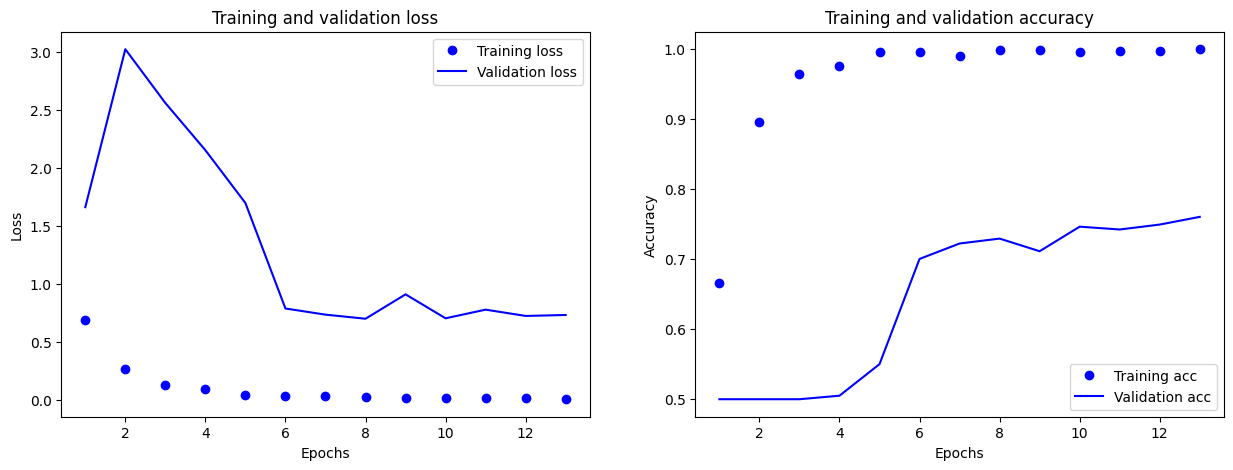

In [27]:
show_plot(history)

In [28]:
model = models.load_model(best_model)
results = model.evaluate(test_generator)
print('test accuracy is {} % '.format(results[1]*100))

50/50 [==============================] - 16s 315ms/step - loss: 0.8397 - acc: 0.7470
test accuracy is 74.6999979019165 % 


### Separable Conv

In [29]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_196 (Conv2D)         (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_197 (Conv2D)         (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_198 (Conv2D)         (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 17, 17, 256)     

In [30]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 134s 1s/step - loss: 0.6895 - acc: 0.5245 - val_loss: 0.6909 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 133s 1s/step - loss: 0.6689 - acc: 0.5915 - val_loss: 0.6578 - val_acc: 0.5950
Epoch 3/30
100/100 [==============================] - 133s 1s/step - loss: 0.6519 - acc: 0.6055 - val_loss: 0.7113 - val_acc: 0.5410
Epoch 4/30
100/100 [==============================] - 133s 1s/step - loss: 0.6315 - acc: 0.6485 - val_loss: 0.6299 - val_acc: 0.6460
Epoch 5/30
100/100 [==============================] - 133s 1s/step - loss: 0.6106 - acc: 0.6590 - val_loss: 0.6301 - val_acc: 0.6250
Epoch 6/30
100/100 [==============================] - 136s 1s/step - loss: 0.5911 - acc: 0.6845 - val_loss: 0.6070 - val_acc: 0.6770
Epoch 7/30
100/100 [==============================] - 137s 1s/step - loss: 0.5633 - acc: 0.7125 - val_loss: 0.6031 - val_acc: 0.6670
Epoch 8/30
100/100 [==============================] - 136s 1s/step - loss: 0.546

<Figure size 640x480 with 0 Axes>

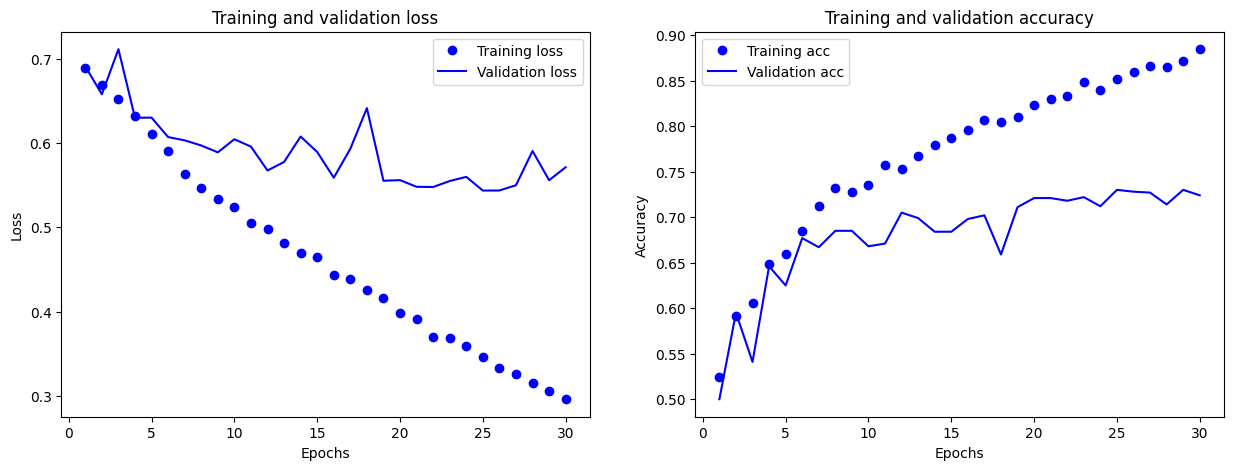

In [31]:
show_plot(history)

In [32]:
results = model.evaluate(test_generator)
print('test accuracy is {} % '.format(results[1]*100))

50/50 [==============================] - 11s 224ms/step - loss: 0.5739 - acc: 0.7340
test accuracy is 73.4000027179718 % 


In [33]:
model = models.Sequential()
model.add(layers.SeparableConv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.SeparableConv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SeparableConv2D(512, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d (Separable  (None, 148, 148, 64)     283       
 Conv2D)                                                         
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 64)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_1 (Separab  (None, 72, 72, 128)      8896      
 leConv2D)                                                       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 128)      0         
 g2D)                                                            
                                                                 
 separable_conv2d_2 (Separab  (None, 34, 34, 256)     

In [34]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/30


c:\Users\hp\anaconda3\envs\keras\lib\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


100/100 [==============================] - 89s 883ms/step - loss: 0.6932 - acc: 0.4890 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 86s 865ms/step - loss: 0.6932 - acc: 0.4915 - val_loss: 0.6931 - val_acc: 0.5010
Epoch 3/30
100/100 [==============================] - 86s 858ms/step - loss: 0.6932 - acc: 0.4930 - val_loss: 0.6931 - val_acc: 0.5120
Epoch 4/30
100/100 [==============================] - 86s 858ms/step - loss: 0.6931 - acc: 0.5055 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 86s 858ms/step - loss: 0.6932 - acc: 0.4980 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 86s 857ms/step - loss: 0.6931 - acc: 0.5120 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 86s 857ms/step - loss: 0.6931 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.4990
Epoch 8/30
100/100 [==============================] - 86s 858ms/st

<Figure size 640x480 with 0 Axes>

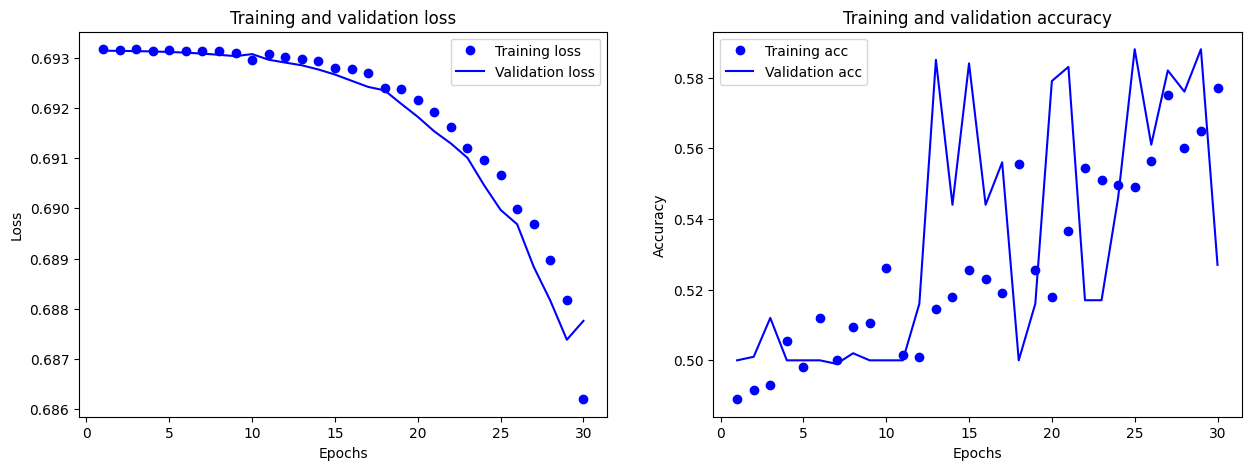

In [35]:
show_plot(history)

In [36]:
results = model.evaluate(test_generator)
print('test accuracy is {} % '.format(results[1]*100))



50/50 [==============================] - 9s 188ms/step - loss: 0.6885 - acc: 0.5240
test accuracy is 52.399998903274536 % 
